Train RMSE: 0.28102608595479894
Train R2: 0.9270555540806752
Eval RMSE: 0.7633327261187006
Eval R2: 0.46774608984773114
Test RMSE: 0.7687118958676349
Test R2: 0.4482933621427614

Model Performance Summary:
   Train RMSE  Train R2  Eval RMSE   Eval R2  Test RMSE   Test R2
0    0.281026  0.927056   0.763333  0.467746   0.768712  0.448293


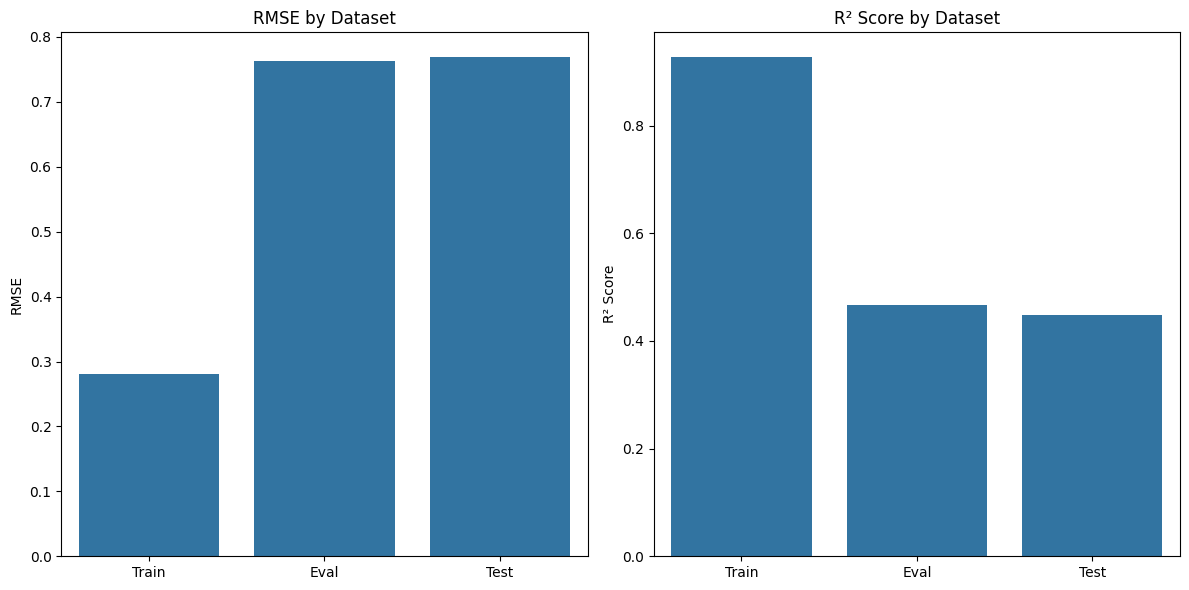


Performance report generated and saved as 'model_performance_report.md'.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')

train_data = pd.read_csv("train.csv")
train_data = train_data.dropna()

X = train_data['full_text']
y = train_data['score']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train.values.astype('U'))
X_eval_vect = vectorizer.transform(X_eval.values.astype('U'))
X_test_vect = vectorizer.transform(X_test.values.astype('U'))

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_vect, y_train)

y_pred_train = model.predict(X_train_vect)
y_pred_eval = model.predict(X_eval_vect)
y_pred_test = model.predict(X_test_vect)

performance = {}
performance['Train RMSE'] = np.sqrt(mean_squared_error(y_train, y_pred_train))
performance['Train R2'] = r2_score(y_train, y_pred_train)
performance['Eval RMSE'] = np.sqrt(mean_squared_error(y_eval, y_pred_eval))
performance['Eval R2'] = r2_score(y_eval, y_pred_eval)
performance['Test RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred_test))
performance['Test R2'] = r2_score(y_test, y_pred_test)

print("Train RMSE:", performance['Train RMSE'])
print("Train R2:", performance['Train R2'])
print("Eval RMSE:", performance['Eval RMSE'])
print("Eval R2:", performance['Eval R2'])
print("Test RMSE:", performance['Test RMSE'])
print("Test R2:", performance['Test R2'])

performance_df = pd.DataFrame([performance])
print("\nModel Performance Summary:")
print(performance_df)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=['Train', 'Eval', 'Test'], y=[performance['Train RMSE'], performance['Eval RMSE'], performance['Test RMSE']])
plt.title('RMSE by Dataset')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
sns.barplot(x=['Train', 'Eval', 'Test'], y=[performance['Train R2'], performance['Eval R2'], performance['Test R2']])
plt.title('R² Score by Dataset')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

report = "## Model Performance Summary\n\n"
report += performance_df.to_markdown() + "\n\n"

report += "## Detailed Metrics\n\n"
report += f"- **Train RMSE**: {performance['Train RMSE']:.4f}\n"
report += f"- **Train R²**: {performance['Train R2']:.4f}\n"
report += f"- **Eval RMSE**: {performance['Eval RMSE']:.4f}\n"
report += f"- **Eval R²**: {performance['Eval R2']:.4f}\n"
report += f"- **Test RMSE**: {performance['Test RMSE']:.4f}\n"
report += f"- **Test R²**: {performance['Test R2']:.4f}\n\n"

with open("model_performance_report.md", "w") as file:
    file.write(report)

print("\nPerformance report generated and saved as 'model_performance_report.md'.")